# Coursera - Finite Differences - Grid-Staggering Elastic 1D

## Import libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Defining parameters

In [6]:
x_n_points = 1000           # Number of points in X
t_n_points = 1300           # Number of time steps
x_max = 1000000             # Length of the domain, m
dx = x_max/x_n_points
x = np.zeros(x_n_points)
for i in range(0, x_n_points - 1):
    x[i] = i*dx

eps = 0.8                   # CFL Stability criteria
c_0 = 4500                  # Shear velocity in the medium
dt = eps * dx/float(c_0)
t = np.zeros(t_n_points)
for i in range(0, t_n_points - 1):
    t[i] = i*dt

source_x = x_n_points//2     # Source location
f_0 = 0.1                   # Dominant frequency, Hz
rho_0 = 2500                # density, kg/m3
mu_0 = rho_0 * c_0**2       # Shear modulus, Pa
T_0 = 1/float(f_0)          # Time period, 1/s
a = 4/float(T_0)            # Half width
lam = c_0 * T_0             # Wavelength
t_0 = T_0/float(dt)

temp = np.zeros(t_n_points)
src = np.zeros(t_n_points)
for it in range(0, t_n_points - 1):
    t = (it - t_0)*dt
    temp[it] = -2 * a * t * np.exp(-(a * t) ** 2)
src[0:len(temp)] = temp
f_snap = 2                  # snapshot frequency

## Staggered Solution

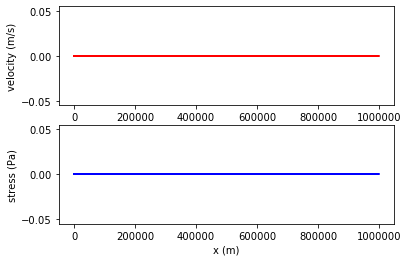

<Figure size 432x288 with 0 Axes>

In [7]:
v = np.zeros(x_n_points)    # Define velocity
v_next = np.zeros(x_n_points)
dv = np.zeros(x_n_points)

sig = np.zeros(x_n_points)    # Define stress
sig_next = np.zeros(x_n_points)
dsig = np.zeros(x_n_points)

mu = np.zeros(x_n_points)    # Define mu and rho
rho = np.zeros(x_n_points)
mu = mu + mu_0               # Assuming homogeneous conditions
rho = rho + rho_0

title = "Elastic 1D staggered grid"
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
line1 = ax1.plot(x, v, color = "red", lw = 1.5)
line2 = ax2.plot(x, sig, color = "blue", lw = 1.5)
ax1.set_ylabel('velocity (m/s)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('stress (Pa)')
plt.ion()
plt.show()

for it in range(0, t_n_points - 1):
    for i in range(2, x_n_points - 2):
        dsig[i] = (0.0416666 * sig[i - 1] - 1.125 * sig[i] + 1.125 * sig[i + 1] - 0.0416666 * sig[i + 2]) / float(dx)

    v = v + dt*dsig/rho        # Updating velocity
    v[source_x] = v[source_x] + dt*src[it]/float(dt*rho[source_x])      # Adding the source term

    for i in range(2, x_n_points - 2):
        dv[i] = (0.0416666 * v[i - 2] - 1.125 * v[i - 1] + 1.125 * v[i] - 0.0416666 * v[i + 1]) / float(dx)

    sig = sig + dt*dv*mu       # Updating stress

    # Updating the plots
    if not it % f_snap:
        for l in line1:
            l.remove()
            del l
        for l in line2:
            l.remove()
            del l
        line1 = ax1.plot(x, v, color="red", lw=1.5)
        line2 = ax2.plot(x, sig, color="blue", lw=1.5)

        ax1.set_title(title + ", time step: %i" % (it))
        plt.gcf().canvas.draw()

plt.ioff()
plt.show()